Import the necessary packages.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

Open and print a part of the dataset. You can find the dataset I used [here](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors).

In [4]:
path = "/content/StudentPerformanceFactors.csv"
df = pd.read_csv(path)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


Look for missing values in each column and fill them in.

In [ ]:
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [5]:
missing_columns = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
for column in missing_columns:
  df[column] = df[column].fillna(df[column].mode()[0])
print(df.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


Changing the categorical data to binary through one-hot encoding to make it easier for the LR model to process data.

In [ ]:
# Extract categorical columns from the data
categorical_columns = []
for column in df.columns:
  if df[column].dtype == 'object':
    categorical_columns.append(column)
print(categorical_columns)

# One-hot encode the categorical data
new_df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
new_df.head()

['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False


Standardizing the data to improve accuracy.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)
new_df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,0.504942,0.348375,-0.019796,-0.143800,-1.213934,0.031411,-0.060578,1.985362,-1.017868,-0.498013,...,0.806543,0.661006,-0.803479,1.226601,-0.342867,0.997128,-0.496118,-0.658407,0.819899,0.855746
1,-0.162822,-1.383736,0.661399,-1.116110,0.411451,1.001199,-1.602931,1.985362,-1.017868,-0.498013,...,0.806543,0.661006,-0.803479,-0.815261,-0.342867,-1.002880,-0.496118,1.518818,-1.219662,-1.168570
2,0.671882,1.560853,-0.019796,1.106313,0.411451,1.001199,1.738833,-0.503687,0.982446,-0.498013,...,0.806543,0.661006,1.244587,-0.815261,-0.342867,-1.002880,2.015648,-0.658407,0.819899,0.855746
3,1.506587,0.781403,0.661399,1.592469,-0.401242,1.001199,0.967657,1.985362,-1.017868,-0.498013,...,0.806543,0.661006,-0.803479,-0.815261,-0.342867,0.997128,-0.496118,1.518818,-1.219662,0.855746
4,-0.162822,1.041220,-0.700990,-0.699406,1.224144,1.001199,0.710598,-0.503687,0.982446,-0.498013,...,-1.239859,0.661006,1.244587,-0.815261,-0.342867,-1.002880,-0.496118,-0.658407,0.819899,-1.168570


Training the Linear Regression model.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = new_df.drop('Exam_Score', axis=1)
y = new_df['Exam_Score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

Evaluating the accuracy of the model by finding the Root Mean Squared Error.

In [9]:
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)

print("Linear Regression RMSE:", rmse_lr)

Linear Regression RMSE: 0.46384824343132064


Comparing the RMSE of Linear Regression with other models to determine the most accurate model.

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()

rf.fit(x_train, y_train)
dt.fit(x_train, y_train)
svr.fit(x_train, y_train)
knn.fit(x_train, y_train)

rf_pred = rf.predict(x_test)
dt_pred = dt.predict(x_test)
svr_pred = svr.predict(x_test)
knn_pred = knn.predict(x_test)

mse_rf = mean_squared_error(y_test, rf_pred)
mse_dt = mean_squared_error(y_test, dt_pred)
mse_svr = mean_squared_error(y_test, svr_pred)
mse_knn = mean_squared_error(y_test, knn_pred)

rmse_rf = np.sqrt(mse_rf)
rmse_dt = np.sqrt(mse_dt)
rmse_svr = np.sqrt(mse_svr)
rmse_knn = np.sqrt(mse_knn)

print("Random Forest RMSE:", rmse_rf)
print("Decision Tree RMSE:", rmse_dt)
print("Support Vector Machine RMSE:", rmse_svr)
print("K-Nearest Neighbors RMSE:", rmse_knn)

Random Forest RMSE: 0.5704442969942541
Decision Tree RMSE: 0.9819859730841333
Support Vector Machine RMSE: 0.4710871394653889
K-Nearest Neighbors RMSE: 0.7336419914604584


Ranking the RMSEs of different models from best to worst.

In [11]:
rmse_values = {
    'Linear Regression': rmse_lr,
    'Random Forest': rmse_rf,
    'Decision Tree': rmse_dt,
    'Support Vector Machine': rmse_svr,
    'K-Nearest Neighbors': rmse_knn
}

sorted_models = sorted(rmse_values.items(), key=lambda x: x[1])

print("Models Ranked by RMSE (Best to Worst):")
for model, rmse in sorted_models:
    print(f"{model}: {rmse}")

Models Ranked by RMSE (Best to Worst):
Linear Regression: 0.46384824343132064
Support Vector Machine: 0.4710871394653889
Random Forest: 0.5704442969942541
K-Nearest Neighbors: 0.7336419914604584
Decision Tree: 0.9819859730841333


Visualizing the RMSE ranking for further clarity.

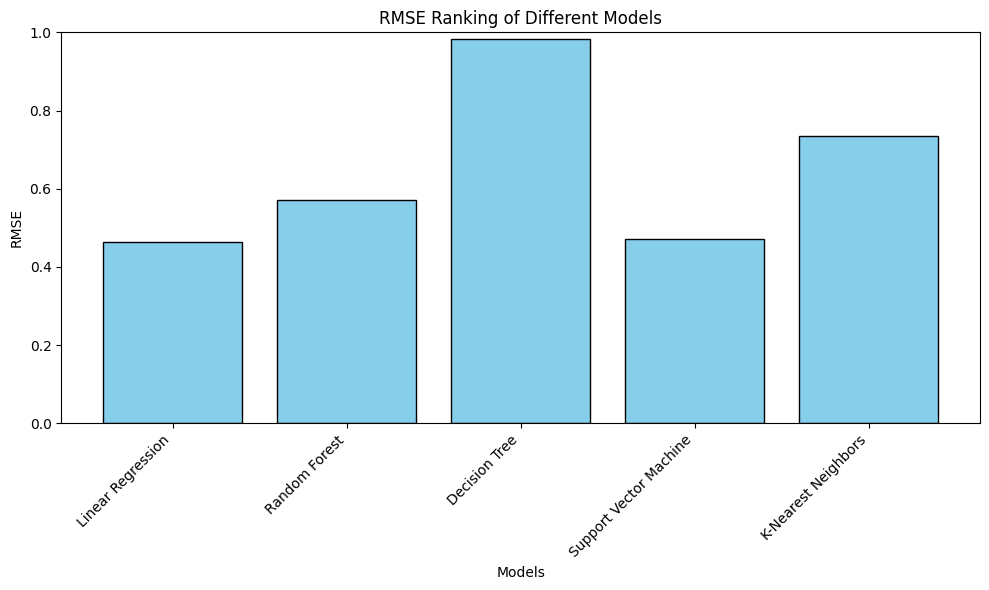

In [12]:
models = list(rmse_values.keys())
rmse = list(rmse_values.values())

plt.figure(figsize=(10, 6))
plt.bar(models, rmse, color='skyblue', edgecolor='black')
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Ranking of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Save the best performing model.

In [13]:
import joblib
joblib.dump(lr, 'linear_regression_model.pkl')

['linear_regression_model.pkl']